In [47]:
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize 
dictionary = pd.read_csv('data/MELBOURNE_HOUSE_PRICES_LESS.csv')
main       = pd.read_csv("data/Melbourne_housing_FULL.csv")
dict_df = pd.DataFrame.from_dict(dictionary, orient='columns', dtype=None)
main_df = pd.DataFrame.from_dict(main, orient='columns', dtype=None)

In [48]:
### Removing the outliers
filter_df = main_df[main_df['Landsize'] < 3000]
filter_df = main_df[main_df['Price'] < 4000000]
filter_df = main_df[main_df['Rooms'] < 10]

# Segregating the features that have an influence on the price.
features = filter_df[['Suburb','Rooms','Price','Postcode','Bedroom2','Bathroom','Car','Landsize','CouncilArea','Distance']].copy()
features.info()
features.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34847 entries, 0 to 34856
Data columns (total 10 columns):
Suburb         34847 non-null object
Rooms          34847 non-null int64
Price          27239 non-null float64
Postcode       34846 non-null float64
Bedroom2       26635 non-null float64
Bathroom       26626 non-null float64
Car            26124 non-null float64
Landsize       23043 non-null float64
CouncilArea    34844 non-null object
Distance       34846 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.9+ MB


,Suburb,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Distance
0,Abbotsford,2,NaN,3067.0,2.0,1.0,1.0,126.0,Yarra City Council,2.5
1,Abbotsford,2,1480000.0,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,2.5
2,Abbotsford,2,1035000.0,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,2.5
3,Abbotsford,3,NaN,3067.0,3.0,2.0,1.0,0.0,Yarra City Council,2.5
4,Abbotsford,3,1465000.0,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,2.5


In [49]:
### It appears that there could be a minor set of NANs in the data. These NANs can be removed from the data set.
### features.

features = features.dropna()
features.info()
features.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17698 entries, 1 to 34856
Data columns (total 10 columns):
Suburb         17698 non-null object
Rooms          17698 non-null int64
Price          17698 non-null float64
Postcode       17698 non-null float64
Bedroom2       17698 non-null float64
Bathroom       17698 non-null float64
Car            17698 non-null float64
Landsize       17698 non-null float64
CouncilArea    17698 non-null object
Distance       17698 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 1.5+ MB


,Suburb,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Distance
1,Abbotsford,2,1480000.0,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,2.5
2,Abbotsford,2,1035000.0,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,2.5
4,Abbotsford,3,1465000.0,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,2.5
5,Abbotsford,3,850000.0,3067.0,3.0,2.0,1.0,94.0,Yarra City Council,2.5
6,Abbotsford,4,1600000.0,3067.0,3.0,1.0,2.0,120.0,Yarra City Council,2.5


In [50]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('Price ~ Rooms',features).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     4608.
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        04:32:08   Log-Likelihood:            -2.6010e+05
No. Observations:               17698   AIC:                         5.202e+05
Df Residuals:                   17696   BIC:                         5.202e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.262e+05   1.49e+04      8.452      0.0

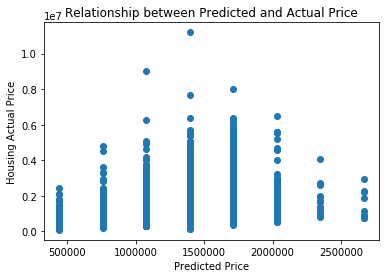

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
# your turn
plt.scatter(m.fittedvalues, features.Price)
plt.xlabel("Predicted Price")
plt.ylabel("Housing Actual Price")
plt.title("Relationship between Predicted and Actual Price")
plt.show()

Based on the above plot, Predicted price doesnt appear to be varying linearly with actual price. This may be due to the strings (suburbs, CouncilArea) in the features. Therefore, we will consider the featue distance and ignore the locations.

In [57]:

features = main_df[['Rooms','Price','Bedroom2','Bathroom','Car','Landsize','Distance']].copy()
features = features.dropna()
features.info()
m = ols('Price ~ Rooms',features).fit()
print(m.summary())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17701 entries, 1 to 34856
Data columns (total 7 columns):
Rooms       17701 non-null int64
Price       17701 non-null float64
Bedroom2    17701 non-null float64
Bathroom    17701 non-null float64
Car         17701 non-null float64
Landsize    17701 non-null float64
Distance    17701 non-null float64
dtypes: float64(6), int64(1)
memory usage: 1.1 MB
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     4551.
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        04:35:13   Log-Likelihood:            -2.6017e+05
No. Observations:               17701   AIC:                         5.203e+05
Df Residuals:                   17699   BIC:  

#### Linear Regression fitting

In [58]:
from sklearn.linear_model import LinearRegression
X = features.drop('Price', axis = 1)
Y = features.Price
# This creates a LinearRegression object
lm = LinearRegression()
lm.fit(X,Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
print(lm.coef_)


print(lm.intercept_)

[ 2.48320600e+05  2.76403260e+04  2.10261971e+05  4.87701807e+04
  5.16596037e+00 -3.79259819e+04]
256273.1223248872


In [63]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Number of coefficients: {}'.format(len(lm.coef_)))
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
# first five predicted prices
lm.predict(X)[0:5]

Estimated intercept coefficient: 256273.1223248872
Number of coefficients: 6


array([ 973455.69442054,  924447.87957199, 1410557.12499887,
       1459120.66725574, 1546083.79157168])

#### Evaluating the Model by using RSS (Residual sum of squares)

In [65]:
import numpy as np
print(np.sum((features.Price - lm.predict(X)) ** 2))

4730802884092992.0


Based on results derived in Data wrangling / Inferential stats, Location played a key role in price determination.
Therefore we will fit a linear regression model based on 3 independent variables:
    
    1) Distance from City
    2) Number of Rooms 
    3) Landsize

#### Fitting the features onto a linear regression model and analysing the results

In [76]:
m_dist = ols('Price ~ Distance',features).fit()
print(m_dist.summary())

m_rm = ols('Price ~ Rooms',features).fit()
print(m_rm.summary())

m_land = ols('Price ~ Landsize',features).fit()
print(m_land.summary())

# F-Statistic and R-Squared statistic
aov_dist = sm.stats.anova_lm(m_dist, typ=2)
print(aov_dist)

# F-Statistic and R-Squared statistic
aov_rm = sm.stats.anova_lm(m_rm, typ=2)
print(aov_rm)

# F-Statistic and R-Squared statistic
aov_land = sm.stats.anova_lm(m_land, typ=2)
print(aov_land)


# Analysing the above results, it appears that the F-Statistic and R-Squared values are high for RM.
# We can conclude that RM(Number of rooms) is a significant feature in predicting the model followed by 
# PTR (Student Teacher ratio)

# Constructing the model with all the 3 features
m_complete = ols('Price ~ Distance + Rooms + Landsize',features).fit()
print(m_complete.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     895.1
Date:                Sat, 06 Apr 2019   Prob (F-statistic):          6.75e-192
Time:                        05:52:04   Log-Likelihood:            -2.6176e+05
No. Observations:               17701   AIC:                         5.235e+05
Df Residuals:                   17699   BIC:                         5.235e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.336e+06   9396.042    142.206      0.0

#### Plotting and analysing the summary

Text(0.5,1,'Fitted VS Residuals')

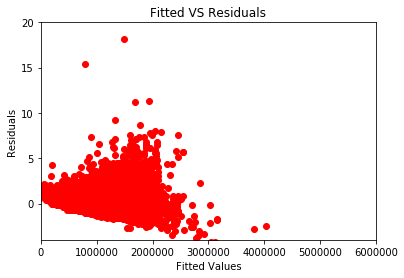

In [81]:
import statsmodels.formula.api as sm
msm = sm.ols(formula='Price ~ Distance + Rooms + Landsize', data=features)
fitted = msm.fit()

## Fitted values VS Residual plot
plt.plot(fitted.fittedvalues, fitted.resid_pearson,'ro')
plt.ylim(-4, 20)
plt.xlim(-5,6000000)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted VS Residuals')



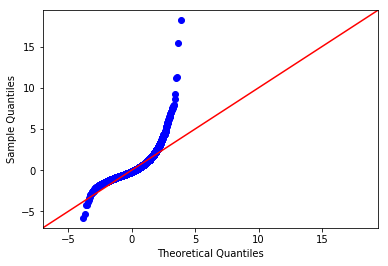

In [82]:
# Quantile plot
import statsmodels.api as sm
import pylab

sm.qqplot(fitted.resid_pearson, line='45')
pylab.show()